## 01. 앙상블 기본- 결정트리(decision tree)
<pre>
(가) decision tree는 classification(분류)와 regression(회귀)  문제에 널리 사용하는 모델이다.
(나) 스무고개 놀이의 질문과 비슷하다.
</pre>

<pre>
graphviz 설치하기
A. https://graphviz.gitlab.io/_pages/Download/Download_windows.html에서 프로그램 다운로드
B. 환경변수 설정
   제어판 > 시스템 및 보안 > 시스템 > 고급 시스템 설정 > 환경 변수
     변수 이름 : GRAPHVIZ_DOT
     변수 값   : C:\Program Files (x86)\Graphviz2.38\bin
C. anaconda prompt에서 'pip install GraphViz'로 설치 진행
</pre>
<img src="img/graphviz01.png">

In [8]:
import graphviz
%matplotlib inline

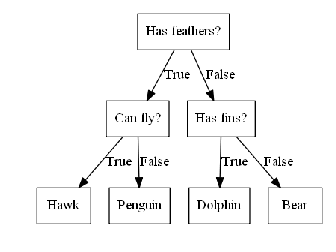

In [9]:
import mglearn
mglearn.plots.plot_animal_tree()

### 의사결정 트리 설명
<pre>
(가) 세개의 변수가 있다. 
   'Has feathers?'(날개가 있나요?)
   'Can fly?'(날수 있나요?)
   'Has fins?'(지느러미가 있나요?)

(나) 우리가 분류하고자 하는 문제는 네 개의 클래스로 구분하는 모델을 만든다.
네 개의 클래스(매, 펭권, 돌고래, 곰)
</pre>

## 의사결정트리- 모델 만들기
<pre>
(1) 데이터 셋
(2) 첫번째 나누기 x[1] = 0.0596
(3) 두번째 나누기 x[0] <= 0.4177, x[0] <= 1.1957
</pre>
<img src="img/decisiontree01.png"><br>
<img src="img/decisiontree02.png"><br>
<img src="img/decisiontree03.png"><br>
(참조 : 파이썬을 활용한 머신러닝 그림 참조)

### 설명
<pre>
(가) 의사결정트리는 반복된 프로세스에 의해 <b>테스트 노드가 하나씩</b>을 가진 
      이진의사결정트리를 만든다. (하나의 축을 따라 데이터를 둘로 나눈다.)
(나) 각 테스트는 <b>하나의 특성</b>에 관해서만 이루어진다.
(다) 데이터를 분할하는 것은 결정트리 리프(leaf)가 노드가 <b>하나의 target(목표 값)</b>을 가질 때까지 반복.
(라) Target(목표 값) 하나로만 이루어진 Leaf node(리프 노드)를 <b>순수노드(pure node)</b>라고 한다.
</pre>

<img src="img/decisiontree04.png"><br>

#### 새로운 데이터(test) 셋에 대한 예측은 주어진 데이터 포인트가 분할한 영역 중에 어디에 놓이는 가를 확인하면 된다.

## 회귀 문제에서의 의사결정트리(decision tree)
<pre>
(1) 각 노드의 테스트 결과에 따라 트리를 탐색해 나가고 새로운 데이터 포인트에 해당되는 리프 노드(leaf node)를 찾는다.
(2) 찾은 리프 노드(leaf node)의 훈련 데이터 평균값이 이 데이터 포인트의 출력이 된다.
</pre>

## 의사결정 트리의 단점(복잡하다) - Overfitting
<pre>
(가) 리프 노드가 순수 노드가 될때까지 진행하면 
    <b>모델이 매우 복잡해지고 훈련 데이터의 과대적합(overfitting)</b>이 된다.
    -> 순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는다.
</pre>



## Overfitting(과적합)을 막는 두가지 전략
<pre>
(1) 트리 생성을 일찍 중단하는 전략<b>(pre-pruning) - 사전 가지치기</b>
(2) 트리를 만든 후, 
          데이터 포인트가 적은 노드를 <b>삭제(사후 가지치기-post-pruning)</b> 하거나
          병합하는 전략.<b>(가지치기)-pruning</b>
</pre>

### 그렇다면 어떻게 사전 가지치를 할 수 있을까?


#######트리의 최대 깊이, 리프의 최대 개수 제한, 노드 분할을 위한 포인트의 최소 개수 지정
######사전 가지치기만 지원, DecisionTreeRegressor, DecisionTreeClassifier

## 실습1
<pre>
의사결정트리를 이용하여 데이터 셋을 나누고,
cancer.target를 예측하는 모델을 만들어,
훈련 세트 정확도와 테스트 세트 정확도를 만들어보자.
--> 모델의 테스트 데이터 사이즈, 평가용 데이터 사이즈를 지정할 수 있도록 함수로 만들어보자.
</pre>

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

def testTreeModel(TestSize=0.3):
    cancer = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    test_size = TestSize,
                                                    random_state=77)
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))


In [17]:
testTreeModel(0.3)
testTreeModel(0.1)
testTreeModel(0.2)

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.918
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912


## 실습2
<pre>
위의 함수에 max_depth=4로 모델에 추가해보자.
</pre>

In [18]:
def testTreeModel(TestSize=0.3, treedepth=3):
    cancer = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    test_size = TestSize,
                                                    random_state=77)
    tree = DecisionTreeClassifier(max_depth=treedepth, random_state=0)
    tree.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

In [24]:
# testTreeModel(0.3, 1)
# testTreeModel(0.3, 2)
# testTreeModel(0.3, 3)
# testTreeModel(0.3, 4)
# testTreeModel(0.3, 5)
# testTreeModel(0.3, 6)

for i in range(1,8):
    testTreeModel(0.3, i)

훈련 세트 정확도 : 0.932
테스트 세트 정확도 : 0.883
훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.912
훈련 세트 정확도 : 0.982
테스트 세트 정확도 : 0.906
훈련 세트 정확도 : 0.985
테스트 세트 정확도 : 0.906
훈련 세트 정확도 : 0.992
테스트 세트 정확도 : 0.889
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.901
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.912
